In [93]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


## EX1: create the data and implement PCA algorithm then visualize each like the below figure 


In [94]:
A = np.random.randint(0,50,(100,3))



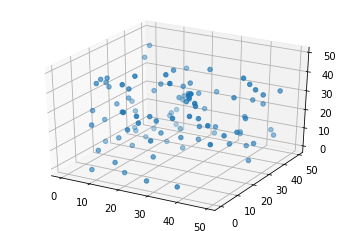

In [95]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter(A[:,0],A[:,1],A[:,2])
# plt.scatter(A[:,0],A[:,1])
# plt.axvline(x=0)
# plt.axhline(y=0)

[23.46 24.32 23.33]


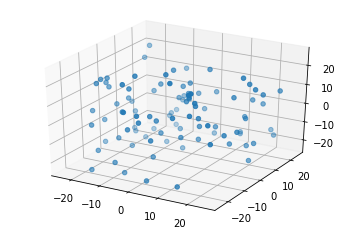

In [96]:
# step1: calculate mean and centering by sub-tracting the mean from each data point
x = np.mean(A, axis = 0)
print(x)
A_std = A - x

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter(A_std[:,0],A_std[:,1],A_std[:,2])


In [97]:
# step2: dividing by the standard deviation to makt the data unit free. Data has
# variance 1 along each axis.
cov_S = np.cov(A_std.T)
print(cov_S)

[[229.16       -10.16888889  34.37191919]
 [-10.16888889 209.02787879 -41.25818182]
 [ 34.37191919 -41.25818182 200.91020202]]


In [98]:
eig_val, eig_vec = np.linalg.eig(cov_S)
print(eig_val)
print(eig_vec)

[270.8233448  210.47735377 157.79738224]
[[-0.61955226  0.72876392 -0.2916473 ]
 [ 0.50382962  0.65410789  0.56417957]
 [-0.60192251 -0.20259818  0.77242687]]


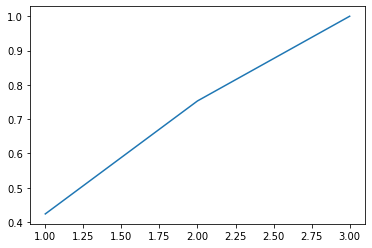

In [99]:
#  chọn K vecto riêng 
tol = sum(eig_val)
var_exp = [(i/tol) for i in sorted(eig_val,reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.plot(range(1,4),cum_var_exp)

In [100]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eig_val[i]), eig_vec[:, i]) for i in range(len(eig_val))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(270.82334480493876, array([-0.61955226,  0.50382962, -0.60192251])),
 (210.4773537661537, array([ 0.72876392,  0.65410789, -0.20259818])),
 (157.79738223698797, array([-0.2916473 ,  0.56417957,  0.77242687]))]

In [101]:
U = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix U:\n', U)

Matrix U:
 [[-0.61955226  0.72876392]
 [ 0.50382962  0.65410789]
 [-0.60192251 -0.20259818]]


In [102]:
A_new = np.dot(A_std,U)


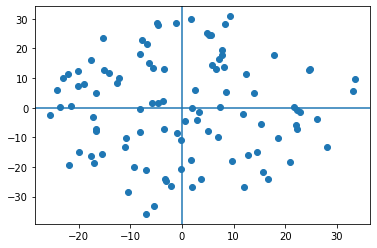

In [103]:
plt.scatter(A_new[:,1],A_new[:,0])
plt.axvline(x=0)
plt.axhline(y=0)

## EX2: implement PCA algorithm to reduce dimension(2D) of iris dataset then visualize the result. 


In [104]:
dt = pd.read_csv("/content/iris.data",header = None)
print(dt.shape)
dt = dt.drop_duplicates()
print(dt.shape)


(150, 5)
(147, 5)


In [105]:
del dt[4]

In [106]:
dt.head(n=3)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [107]:
dt = np.array(dt)

In [108]:
B = dt
x = np.mean(B)
B_std = B - x

In [109]:
cov_S = np.cov(B_std.T)
eig_val, eig_vec = np.linalg.eig(cov_S)
print(eig_val)
print(eig_vec)

[4.19932336 0.2447766  0.07900451 0.02412319]
[[ 0.36309038 -0.65307144 -0.58432217  0.31659229]
 [-0.08327366 -0.73314429  0.59300302 -0.32235442]
 [ 0.85654831  0.17537159  0.07656474 -0.47927825]
 [ 0.35714965  0.07240135  0.54868285  0.75242894]]


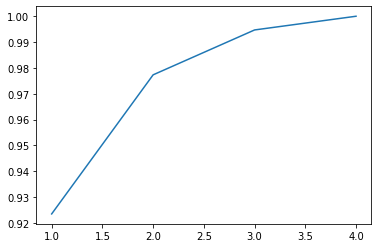

In [110]:
tol = sum(eig_val)
var_exp = [(i/tol) for i in sorted(eig_val,reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.plot(range(1,5),cum_var_exp)

In [111]:
eigen_pairs = [(np.abs(eig_val[i]), eig_vec[:, i]) for i in range(len(eig_val))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(4.199323357953155,
  array([ 0.36309038, -0.08327366,  0.85654831,  0.35714965])),
 (0.24477660018978176,
  array([-0.65307144, -0.73314429,  0.17537159,  0.07240135])),
 (0.07900451090765652,
  array([-0.58432217,  0.59300302,  0.07656474,  0.54868285])),
 (0.02412318913596782,
  array([ 0.31659229, -0.32235442, -0.47927825,  0.75242894]))]

In [112]:
U = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix U:\n', U)

Matrix U:
 [[ 0.36309038 -0.65307144]
 [-0.08327366 -0.73314429]
 [ 0.85654831  0.17537159]
 [ 0.35714965  0.07240135]]


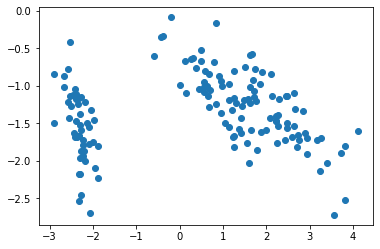

In [113]:
B_new = np.dot(B_std,U)
plt.scatter(B_new[:,0],B_new[:,1])

## EX3: Use PCA in sklearn to iris dataset and compare the result with the question 2.

In [114]:
from sklearn.decomposition import PCA
C = dt 
pca = PCA(n_components = 2)
C_new = pca.fit(C)
C_new = C_new.transform(C)

In [115]:
pca.explained_variance_ratio_

array([0.9234909 , 0.05382985])

In [116]:
pca.singular_values_

array([24.76088064,  5.97807524])

In [117]:
print(C_new.shape)
print(C.shape)

(147, 2)
(147, 4)


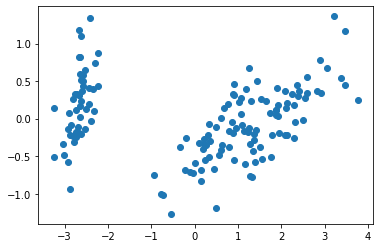

In [118]:
plt.scatter(C_new[:,0],C_new[:,1])